# Boosting-1

- **WA_Fn-UseC_-HR-Employee-Attrition file for classification**
- **kc_house_data file for Regression**

## Importing required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import the sklearn and its corresponding modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## AdaBoost Classifier

### Reading and understanding data

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Data Preparation

In [ ]:
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
df_num = df.select_dtypes(include='int64')
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
cat_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for i in cat_columns:
  print(df[i].value_counts())
  print('\n')

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Gender
Male      882
Female    588
Name: count, dtype: int64


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


OverTime
No     1054
Yes     416
Name: count, dtype: int64




In [ ]:
#create dummy variables
dummy1 = pd.get_dummies(df[cat_columns], drop_first=True, dtype='int64')
dummy1.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
dummy1.shape

(1470, 21)

In [ ]:
df = pd.concat([df,dummy1],axis=1)
df.shape

(1470, 56)

In [ ]:
df = df.drop(cat_columns,axis=1)
df.shape

(1470, 49)

In [ ]:
df['Over18'] = df['Over18'].replace('Y',1)

In [ ]:
df['Attrition'] = df['Attrition'].apply(lambda x:{'Yes':1,'No':0}[x])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [ ]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=0)
print(df_train.shape)
print(df_test.shape)

(1176, 49)
(294, 49)


### Model Building

In [ ]:
X_train = df_train.drop('Attrition',axis=1)
y_train = df_train['Attrition']

X_test = df_test.drop('Attrition',axis=1)
y_test = df_test['Attrition']

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1374,58,605,21,3,1,1938,4,72,3,4,4,17875,11761,4,1,13,3,3,80,1,29,2,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1092,45,950,28,3,1,1546,4,97,3,1,4,2132,4585,4,1,20,4,4,80,1,8,3,3,5,4,0,3,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
768,40,300,26,3,1,1066,3,74,3,2,1,8396,22217,1,1,14,3,2,80,1,8,3,2,7,7,7,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
569,36,1434,8,4,1,789,1,76,2,3,1,7587,14229,1,1,15,3,2,80,0,10,1,3,10,7,0,9,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
911,25,599,24,1,1,1273,3,73,1,1,4,1118,8040,1,1,14,3,4,80,0,1,4,3,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1


In [ ]:
y_train.head()

,Attrition
1374,0
1092,0
768,0
569,0
911,1


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [ ]:
y_test_pred = adaboost.predict(X_test)
print(accuracy_score(y_test,y_test_pred))

0.8367346938775511


In [ ]:
y_train_pred = adaboost.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.939625850340136


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       245
           1       0.52      0.24      0.33        49

    accuracy                           0.84       294
   macro avg       0.69      0.60      0.62       294
weighted avg       0.81      0.84      0.81       294



#### Using GridSearchCV

In [ ]:
model1 = AdaBoostClassifier()

In [ ]:
params_grid = {
    'n_estimators' : [5,10,20,25],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0]
}

In [ ]:
adaboost_grid = GridSearchCV(estimator=model1, param_grid=params_grid, cv=5, n_jobs=-1)
adaboost_grid.fit(X_train, y_train)
print(adaboost_grid.best_score_)
print(adaboost_grid.best_params_)

0.8800829426613775
{'learning_rate': 1.0, 'n_estimators': 25}


In [ ]:
print(adaboost_grid.best_estimator_)

AdaBoostClassifier(n_estimators=25)


In [ ]:
best_est = adaboost_grid.best_estimator_
best_est.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=25)

In [ ]:
y_test_pred = best_est.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.8605442176870748


In [ ]:
y_train_pred = best_est.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.8988095238095238


## Gradient Boost Classifier

**The above steps upto model building are same as in AdaBoost Classifier**

### Model Building

In [ ]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=0)
print(df_train.shape)
print(df_test.shape)

(1176, 49)
(294, 49)


In [ ]:
X_train = df_train.drop('Attrition',axis=1)
y_train = df_train['Attrition']

X_test = df_test.drop('Attrition',axis=1)
y_test = df_test['Attrition']

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1374,58,605,21,3,1,1938,4,72,3,4,4,17875,11761,4,1,13,3,3,80,1,29,2,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1092,45,950,28,3,1,1546,4,97,3,1,4,2132,4585,4,1,20,4,4,80,1,8,3,3,5,4,0,3,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
768,40,300,26,3,1,1066,3,74,3,2,1,8396,22217,1,1,14,3,2,80,1,8,3,2,7,7,7,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
569,36,1434,8,4,1,789,1,76,2,3,1,7587,14229,1,1,15,3,2,80,0,10,1,3,10,7,0,9,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
911,25,599,24,1,1,1273,3,73,1,1,4,1118,8040,1,1,14,3,4,80,0,1,4,3,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1


In [ ]:
y_train.head()

,Attrition
1374,0
1092,0
768,0
569,0
911,1


In [ ]:
gradient_boost = GradientBoostingClassifier(random_state=100)
gradient_boost.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gradient_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=100)

In [ ]:
y_test_pred = gradient_boost.predict(X_test)
print(accuracy_score(y_test,y_test_pred))

0.8605442176870748


In [ ]:
y_train_pred = gradient_boost.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.9583333333333334


In [ ]:
y_test_prob = gradient_boost.predict_proba(X_test)
y_test_prob[:10]

array([[0.93628296, 0.06371704],
       [0.967282  , 0.032718  ],
       [0.78143511, 0.21856489],
       [0.92674469, 0.07325531],
       [0.07434913, 0.92565087],
       [0.61370317, 0.38629683],
       [0.44465158, 0.55534842],
       [0.9385222 , 0.0614778 ],
       [0.97474347, 0.02525653],
       [0.84177757, 0.15822243]])

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.68      0.31      0.42        49

    accuracy                           0.86       294
   macro avg       0.78      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294



In [ ]:
#Tuning with hyper parameters
gradient_boost = GradientBoostingClassifier(n_estimators=500,random_state=100,max_depth=11,learning_rate=0.2,min_samples_leaf=2)
gradient_boost.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=11, min_samples_leaf=2,
                           n_estimators=500, random_state=100)

In [ ]:
y_test_pred = gradient_boost.predict(X_test)
print(accuracy_score(y_test,y_test_pred))

0.8673469387755102


#### Using GridSearchCV

In [ ]:
model2 = GradientBoostingClassifier()

In [ ]:
params_grid = {
    'n_estimators' : [5,10,20,25],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0],
    'max_depth' : [2,3,4,5,6]
}

In [ ]:
gbc_grid = GridSearchCV(estimator=model2, param_grid=params_grid, cv=5, n_jobs=-1)
gbc_grid.fit(X_train, y_train)
print(gbc_grid.best_score_)
print(gbc_grid.best_params_)

0.8579841327082584
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}


In [ ]:
print(gbc_grid.best_estimator_)

GradientBoostingClassifier(n_estimators=20)


In [ ]:
best_est = gbc_grid.best_estimator_
best_est.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20)

In [ ]:
y_train_pred = best_est.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.8826530612244898


In [ ]:
y_test_pred = best_est.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.8537414965986394


## Xtreme Gradient Boost Classifier

**The above steps upto model building are same as in AdaBoost Classifier**

### Model Building

In [ ]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=0)
print(df_train.shape)
print(df_test.shape)

(1176, 49)
(294, 49)


In [ ]:
X_train = df_train.drop('Attrition',axis=1)
y_train = df_train['Attrition']

X_test = df_test.drop('Attrition',axis=1)
y_test = df_test['Attrition']

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1374,58,605,21,3,1,1938,4,72,3,4,4,17875,11761,4,1,13,3,3,80,1,29,2,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1092,45,950,28,3,1,1546,4,97,3,1,4,2132,4585,4,1,20,4,4,80,1,8,3,3,5,4,0,3,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
768,40,300,26,3,1,1066,3,74,3,2,1,8396,22217,1,1,14,3,2,80,1,8,3,2,7,7,7,5,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
569,36,1434,8,4,1,789,1,76,2,3,1,7587,14229,1,1,15,3,2,80,0,10,1,3,10,7,0,9,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
911,25,599,24,1,1,1273,3,73,1,1,4,1118,8040,1,1,14,3,4,80,0,1,4,3,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1


In [ ]:
y_train.head()

,Attrition
1374,0
1092,0
768,0
569,0
911,1


In [ ]:
xgb = XGBClassifier(n_estimators=200, random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
y_test_pred = xgb.predict(X_test)
print(accuracy_score(y_test,y_test_pred))

0.8605442176870748


In [ ]:
y_train_pred = xgb.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

1.0


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.70      0.29      0.41        49

    accuracy                           0.86       294
   macro avg       0.79      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294



#### Using GridSearchCV

In [ ]:
model3 = XGBClassifier()

In [ ]:
params_grid = {
    'n_estimators' : [5,10,20,25],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0],
    'max_depth': [2,3,4,5]
}

In [ ]:
xgb_grid = GridSearchCV(estimator=model3, param_grid=params_grid, cv=5, n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8707536963577353
{'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 20}


In [ ]:
print(xgb_grid.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
best_est = xgb_grid.best_estimator_
best_est.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_pred = best_est.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.8435374149659864


In [ ]:
y_train_pred = best_est.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.9311224489795918


## AdaBoost Regressor

### Reading and understanding data

In [ ]:
df1 = pd.read_csv('kc_house_data.csv')
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df1.shape

(21613, 21)

In [ ]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df1.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df1 = df1.drop(['id','date'],axis=1)

In [ ]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Data Visualization

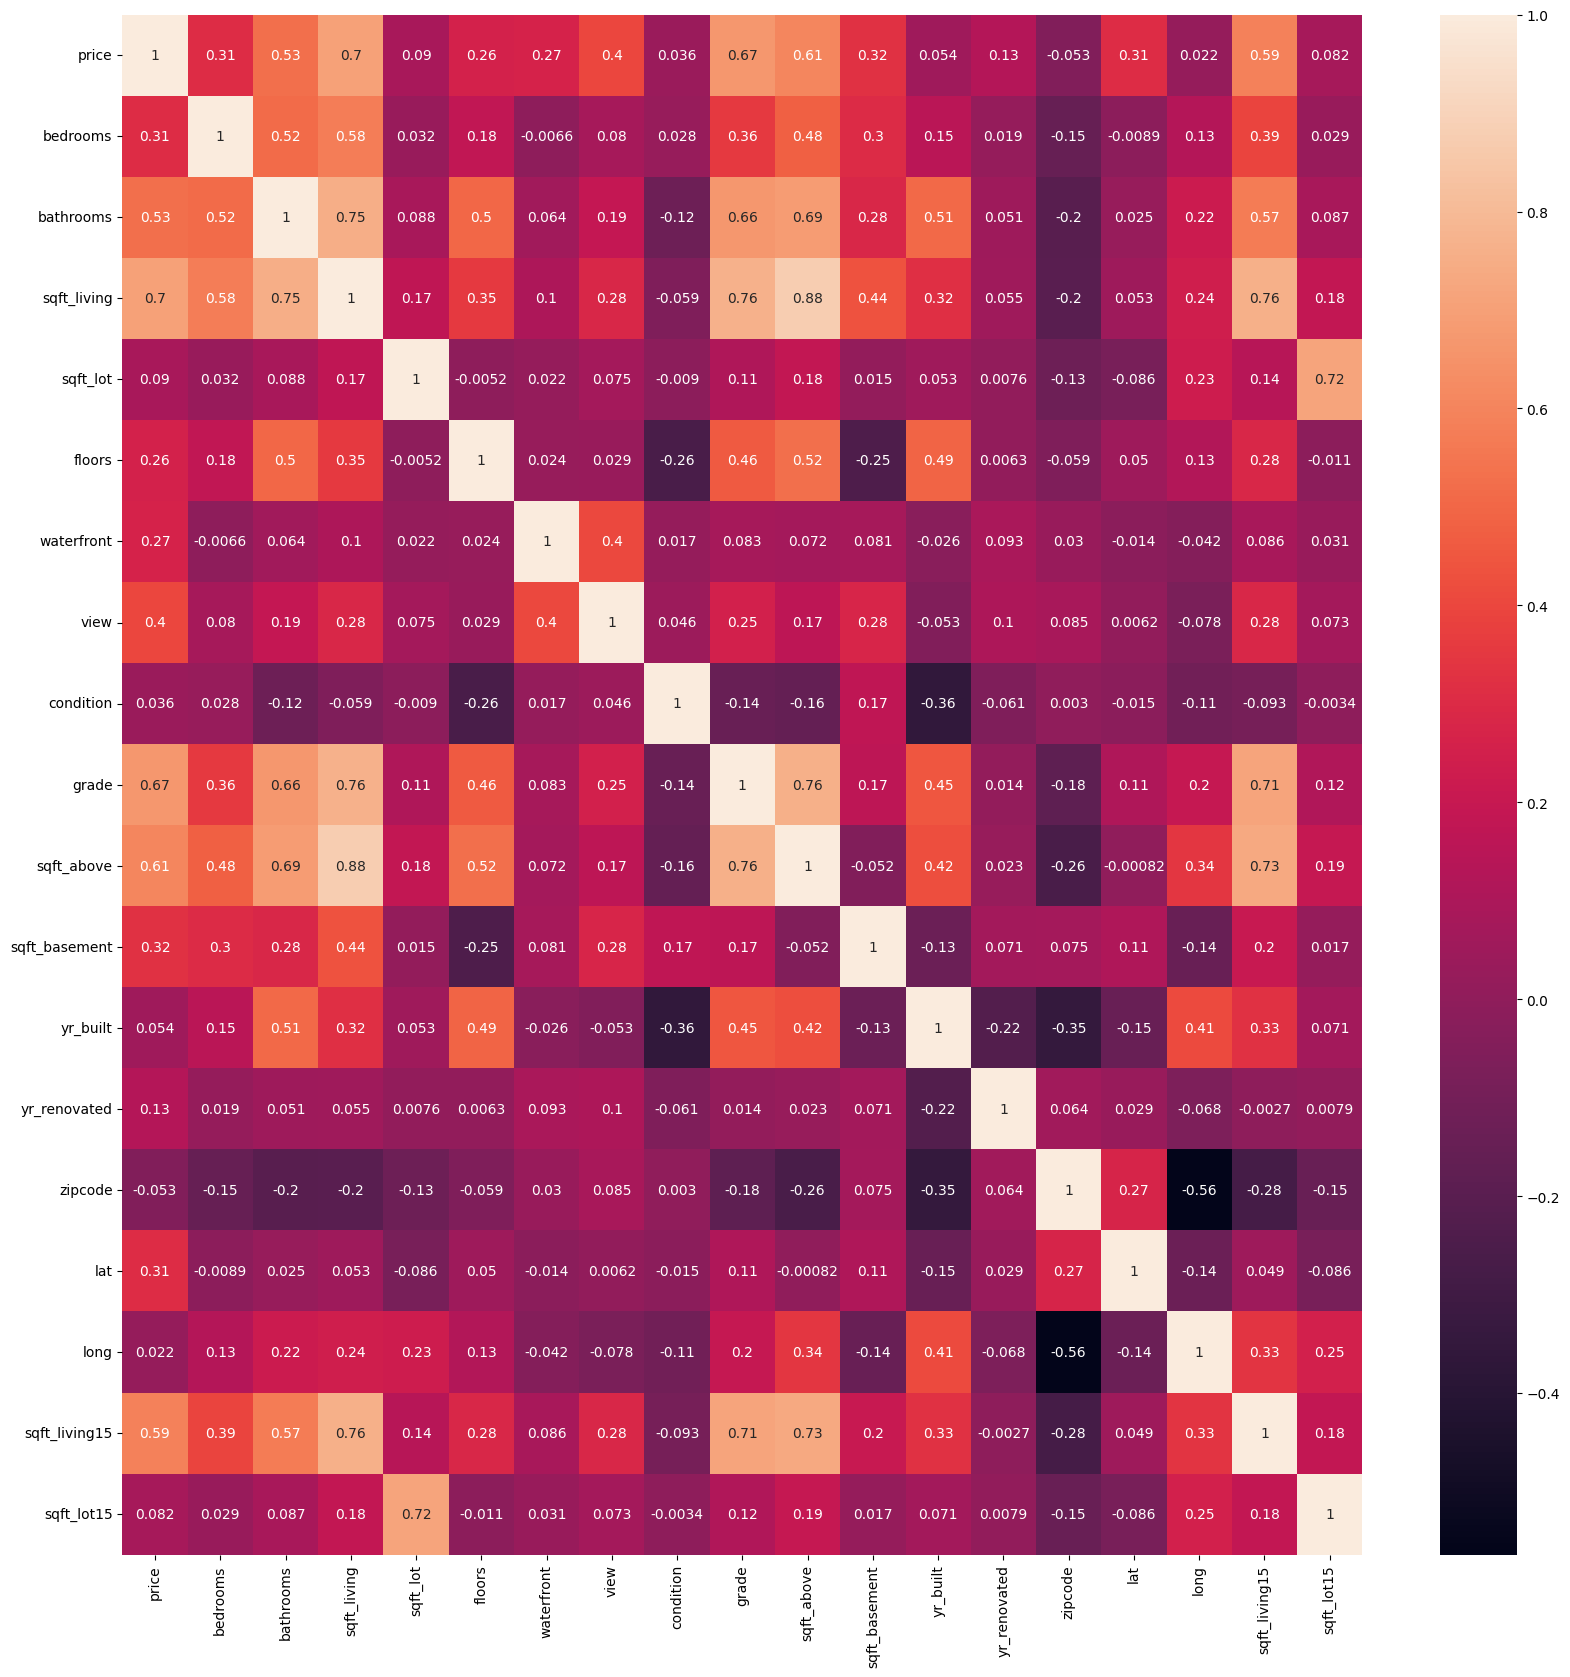

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df1[df1.columns].corr(),annot = True)
plt.show()

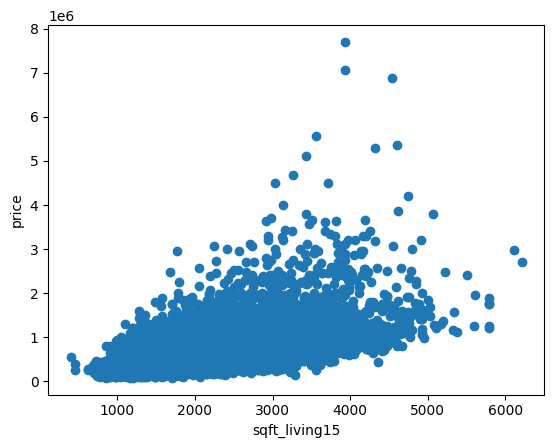

In [ ]:
plt.scatter(y=df1['price'],x=df1['sqft_living15'])
plt.xlabel('sqft_living15')
plt.ylabel('price')
plt.show()

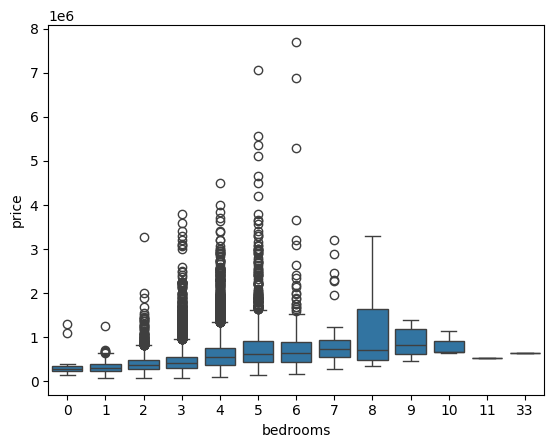

In [ ]:
sns.boxplot(x=df1['bedrooms'],y=df1['price'])
plt.show()

In [ ]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Model Building

In [ ]:
df1_train, df1_test = train_test_split(df1,train_size=0.8,random_state=42)
print(df1_train.shape)
print(df1_test.shape)

(17290, 19)
(4323, 19)


In [ ]:
X_train1 = df1_train.drop('price',axis=1)
y_train1 = df1_train['price']

X_test1 = df1_test.drop('price',axis=1)
y_test1 = df1_test['price']

In [ ]:
adaboost_reg = AdaBoostRegressor(n_estimators=50, random_state=1, learning_rate=0.2, loss='exponential' )
adaboost_reg.fit(X_train1,y_train1)

AdaBoostRegressor(learning_rate=0.2, loss='exponential', random_state=1)

In [ ]:
y_test1_pred = adaboost_reg.predict(X_test1)
print('r2_score:',r2_score(y_test1,y_test1_pred))
print('mean_absolute_error:',mean_absolute_error(y_test1,y_test1_pred))
print('mean_squared_error:',mean_squared_error(y_test1,y_test1_pred))

r2_score: 0.6623297942527446
mean_absolute_error: 147933.32319191378
mean_squared_error: 51047871531.966385


#### Using GridSearchCV

In [ ]:
model1 = AdaBoostRegressor()

In [ ]:
params_grid = {
    'n_estimators' : [5,10,20,25],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0]
}

In [ ]:
adaboost_grid = GridSearchCV(estimator=model1, param_grid=params_grid, cv=5, n_jobs=-1)
adaboost_grid.fit(X_train1, y_train1)
print(adaboost_grid.best_score_)
print(adaboost_grid.best_params_)

0.6621163083157405
{'learning_rate': 0.1, 'n_estimators': 25}


In [ ]:
print(adaboost_grid.best_estimator_)

AdaBoostRegressor(learning_rate=0.1, n_estimators=25)


In [ ]:
best_est = adaboost_grid.best_estimator_
best_est.fit(X_train1, y_train1)

AdaBoostRegressor(learning_rate=0.1, n_estimators=25)

In [ ]:
y_test1_pred = adaboost_grid.predict(X_test1)
print('r2_score:',r2_score(y_test1,y_test1_pred))
print('mean_absolute_error:',mean_absolute_error(y_test1,y_test1_pred))
print('mean_squared_error:',mean_squared_error(y_test1,y_test1_pred))

r2_score: 0.6347506661081421
mean_absolute_error: 141855.2499572771
mean_squared_error: 55217193451.77793


## Gradient Boost Regressor

**The above steps upto model building are same as in ADaboost Regressor**

### Model Building

In [ ]:
df1_train, df1_test = train_test_split(df1,train_size=0.8,random_state=42)
print(df1_train.shape)
print(df1_test.shape)

(17290, 19)
(4323, 19)


In [ ]:
X_train1 = df1_train.drop('price',axis=1)
y_train1 = df1_train['price']

X_test1 = df1_test.drop('price',axis=1)
y_test1 = df1_test['price']

In [ ]:
gradient_boost_reg = GradientBoostingRegressor(random_state=100)
gradient_boost_reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gradient_boost_reg.fit(X_train1,y_train1)

GradientBoostingRegressor(random_state=100)

In [ ]:
y_test1_pred = gradient_boost_reg.predict(X_test1)
print('r2_score:',r2_score(y_test1,y_test1_pred))
print('mean_absolute_error:',mean_absolute_error(y_test1,y_test1_pred))
print('mean_squared_error:',mean_squared_error(y_test1,y_test1_pred))

r2_score: 0.8514007454332205
mean_absolute_error: 81475.52729004288
mean_squared_error: 22464746749.2254


#### Using GridSearchCV

In [ ]:
model2 = GradientBoostingRegressor()

In [ ]:
params_grid = {
    'n_estimators' : [5,10,20,25],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0],
    'max_depth': [2,3,4,5]
}

In [ ]:
gbm_grid = GridSearchCV(estimator=model2, param_grid=params_grid, cv=5, n_jobs=-1)
gbm_grid.fit(X_train1, y_train1)
print(gbm_grid.best_score_)
print(gbm_grid.best_params_)

0.8478129127800151
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 25}


In [ ]:
print(gbm_grid.best_estimator_)

GradientBoostingRegressor(max_depth=5, n_estimators=25)


In [ ]:
best_est = gbm_grid.best_estimator_
best_est.fit(X_train1, y_train1)

GradientBoostingRegressor(max_depth=5, n_estimators=25)

In [ ]:
y_test1_pred = gbm_grid.predict(X_test1)
print('r2_score:',r2_score(y_test1,y_test1_pred))
print('mean_absolute_error:',mean_absolute_error(y_test1,y_test1_pred))
print('mean_squared_error:',mean_squared_error(y_test1,y_test1_pred))

r2_score: 0.8293273554517895
mean_absolute_error: 87667.74717425893
mean_squared_error: 25801729274.981586


## Xtreme Gradient Boost Regressor

**The above steps upto model building are same as in ADaboost Regressor**

### Model Building

In [ ]:
df1_train, df1_test = train_test_split(df1,train_size=0.8,random_state=42)
print(df1_train.shape)
print(df1_test.shape)

(17290, 19)
(4323, 19)


In [ ]:
X_train1 = df1_train.drop('price',axis=1)
y_train1 = df1_train['price']

X_test1 = df1_test.drop('price',axis=1)
y_test1 = df1_test['price']

In [ ]:
xgb_reg = XGBRegressor(random_state=100)
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 100,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
xgb_reg.fit(X_train1,y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=100, ...)

In [ ]:
y_test1_pred = xgb_reg.predict(X_test1)
print('r2_score:',r2_score(y_test1,y_test1_pred))
print('mean_absolute_error:',mean_absolute_error(y_test1,y_test1_pred))
print('mean_squared_error:',mean_squared_error(y_test1,y_test1_pred))

r2_score: 0.8551257509067212
mean_absolute_error: 71751.3801595391
mean_squared_error: 21901612668.60277


#### Using GridSearchCV

In [ ]:
model3 = XGBRegressor()

In [ ]:
params_grid = {
    'n_estimators' : [5,10,20,25],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0],
    'max_depth': [2,3,4,5]
}

In [ ]:
xgb_grid = GridSearchCV(estimator=model3, param_grid=params_grid, cv=5, n_jobs=-1)
xgb_grid.fit(X_train1, y_train1)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8388214693036646
{'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 25}


In [ ]:
print(xgb_grid.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
best_est = xgb_grid.best_estimator_
best_est.fit(X_train1, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test1_pred = best_est.predict(X_test1)
print('r2_score:',r2_score(y_test1,y_test1_pred))
print('mean_absolute_error:',mean_absolute_error(y_test1,y_test1_pred))
print('mean_squared_error:',mean_squared_error(y_test1,y_test1_pred))

r2_score: 0.7733703140794123
mean_absolute_error: 91154.8788759795
mean_squared_error: 34261130817.278473


# Boosting-2

- **With heart_v2.csv file for Classification**

## Importing required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Reading and understanding data

In [ ]:
heart = pd.read_csv('heart_v2.csv')
heart.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [ ]:
heart.shape

(270, 5)

In [ ]:
heart.isnull().sum()

,0
age,0
sex,0
BP,0
cholestrol,0
heart disease,0


## Model Building

In [ ]:
heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state=42)
heart_train.shape, heart_test.shape

((189, 5), (81, 5))

In [ ]:
X_train = heart_train.drop('heart disease', axis=1)
y_train = heart_train['heart disease']
X_test = heart_test.drop('heart disease', axis=1)
y_test = heart_test['heart disease']

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((189, 4), (189,), (81, 4), (81,))

## Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=5,random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=5, random_state=42)

In [ ]:
y_test_pred = adaboost.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.5925925925925926


In [ ]:
y_train_pred = adaboost.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.6984126984126984


#### Using GridSearchCV

In [ ]:
model1 = AdaBoostClassifier()

In [ ]:
params_grid = {
    'n_estimators' : [5,10,20,25],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0]
}

In [ ]:
adaboost_grid = GridSearchCV(estimator=model1, param_grid=params_grid, cv=5, n_jobs=-1)
adaboost_grid.fit(X_train, y_train)
print(adaboost_grid.best_score_)
print(adaboost_grid.best_params_)

0.6826458036984352
{'learning_rate': 0.1, 'n_estimators': 20}


In [ ]:
print(adaboost_grid.best_estimator_)

AdaBoostClassifier(learning_rate=0.1, n_estimators=20)


In [ ]:
best_est = adaboost_grid.best_estimator_
best_est.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=20)

In [ ]:
y_test_pred = best_est.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.6419753086419753


In [ ]:
y_train_pred = best_est.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.7037037037037037


## Gradient Boost Classifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=5, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=5, random_state=42)

In [ ]:
y_train_pred = gbc.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.7354497354497355


In [ ]:
y_test_pred = gbc.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.6296296296296297


#### Using GridSearchCV

In [ ]:
model2 = GradientBoostingClassifier()

In [ ]:
params_grid = {
    'n_estimators' : [5,10,20,25],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0],
    'max_depth' : [2,3,4,5,6]
}

In [ ]:
gbc_grid = GridSearchCV(estimator=model2, param_grid=params_grid, cv=5, n_jobs=-1)
gbc_grid.fit(X_train, y_train)
print(gbc_grid.best_score_)
print(gbc_grid.best_params_)

0.7036984352773826
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 5}


In [ ]:
print(gbc_grid.best_estimator_)

GradientBoostingClassifier(max_depth=2, n_estimators=5)


In [ ]:
best_est = gbc_grid.best_estimator_
best_est.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=5)

In [ ]:
y_train_pred = best_est.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.7037037037037037


In [ ]:
y_test_pred = best_est.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.6419753086419753


## Xtreme Gradient Boost Classifier

In [ ]:
xgb = XGBClassifier(n_estimators=5, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_train_pred = xgb.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.8465608465608465


In [ ]:
y_test_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.7283950617283951


#### Using GridSearchCV

In [ ]:
model3 = XGBClassifier()

In [ ]:
params_grid = {
    'n_estimators' : [5,10,20,25],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0],
    'max_depth' : [2,3,4,5,6]
}

In [ ]:
xgb_grid = GridSearchCV(estimator=model3, param_grid=params_grid, cv=5, n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.714651493598862
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10}


In [ ]:
print(xgb_grid.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
best_est = xgb_grid.best_estimator_
best_est.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = best_est.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.7037037037037037


In [ ]:
y_test_pred = best_est.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.6419753086419753
